In [220]:
"""
    (Successful) Attempt for the controlled version:
"""
import numpy as np
import qiskit
from qiskit.quantum_info import state_fidelity
from numpy import linalg as LA
import qib
import matplotlib.pyplot as plt
import scipy
import h5py

import sys
sys.path.append("../../src/brickwall_sparse")
from utils_sparse import construct_ising_local_term, reduce_list, X, I2, get_perms
from ansatz_sparse import ansatz_sparse
import rqcopt as oc
from scipy.sparse.linalg import expm_multiply
from qiskit.quantum_info import random_statevector
from optimize_sparse import optimize

Vlists_2, Vlists_3, Vlists_4, Vlists_5, Vlists_6, Vlists_9 = ([], [], [], [], [], [])
errs_2, errs_3, errs_4, errs_5, errs_6, errs_9 = ([], [], [], [], [], [])
t_errs2, t_errs3, t_errs6, t_errs9 = ([], [], [], [])
L = 6
ts = list(np.logspace(-10, 1, num=40))

for t in ts:
    latt = qib.lattice.IntegerLattice((L, ), pbc=True)
    field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
    J, h, g = (1, 0, 3)
    hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()
    
    X = np.array([[0, 1], [1, 0]])
    Z = np.array([[1, 0], [0, -1]])
    Y = np.array([[0, -1j], [1j, 0]])
    I2 = np.array([[1, 0], [0, 1]])
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc)
    V2 = scipy.linalg.expm(-1j*t*hloc)
    Vlist_reduced_2 = [V1, V2]
    perms_2 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_2))]
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/2)
    V2 = scipy.linalg.expm(-1j*t*hloc)
    Vlist_reduced_3 = [V1, V2, V1]
    perms_3 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_3))]
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/4)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_5 = [V1, V2, V2, V2, V1]
    perms_5 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_5))]
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/2)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_4 = [V1, V2]*2
    perms_4 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_4))]
    
    V1 = scipy.linalg.expm(-1j*t*hloc/4)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_6 = [V1, V2, V1]*2
    perms_6 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_6))]
    

    state = random_statevector(2**L).data
    t_errs3.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_3, L, perms_3, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    niter = 30
    rS    = 5
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_2, perms_2, rS=rS, niter=niter)
    errs_2.append(err_iter[-1])
    Vlists_2.append(Vlist)
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_3, perms_3, rS=rS, niter=niter)
    errs_3.append(err_iter[-1])
    Vlists_3.append(Vlist)
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_5, perms_5, rS=rS, niter=niter)
    errs_5.append(err_iter[-1])
    Vlists_5.append(Vlist)
    
    """t_errs6.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_6, L, perms_6, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_6, perms_6, rS=rS, niter=niter)
    errs_6.append(err_iter[-1])
    Vlists_6.append(Vlist)"""
    
    """t_errs9.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_9, L, perms_9, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_9, perms_9, rS=rS, niter=niter)
    errs_9.append(err_iter[-1])
    Vlists_9.append(Vlist)"""

Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  5.974749086826701e-16
Current erro

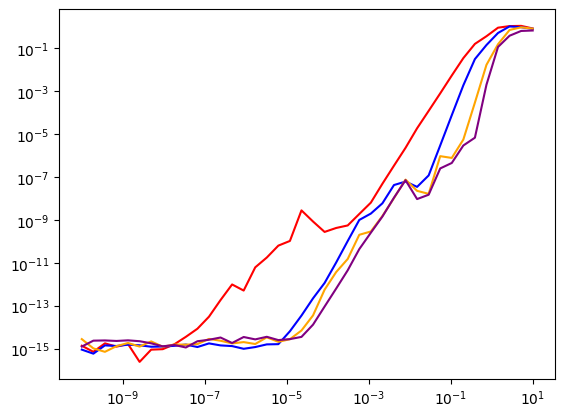

In [482]:
plt.plot(ts, errs_2, color='red')
#plt.plot(ts, t_errsL6_3, color='blue', ls='--')
plt.plot(ts, errs_3, color='blue')
plt.plot(ts, errs_5, color='orange')
#plt.plot(ts, errs_2, color='red')
plt.plot(ts, errs_6, color='purple')
#plt.plot(ts, errs_9, color='pink')



plt.yscale('log')
plt.xscale('log')
#plt.xlim([1e-6, 1.5])

In [584]:
import numpy as np

def random_unitary(n=4):
    """
    Generate a random n x n unitary matrix using QR decomposition.
    Default is 4x4.
    """
    # Random complex Gaussian matrix
    Z = (np.random.randn(n, n) + 1j * np.random.randn(n, n)) / np.sqrt(2)
    
    # QR decomposition
    Q, R = np.linalg.qr(Z)
    
    # Normalize phases to ensure unitarity
    D = np.diag(R)
    L = np.diag(D / np.abs(D))
    
    return Q @ L

In [710]:
import sys
sys.path.append("../../src/brickwall_sparse")
from utils_sparse import construct_ising_local_term, reduce_list, X, I2, get_perms
from ansatz_sparse import ansatz_sparse
import rqcopt as oc
from scipy.sparse.linalg import expm_multiply
from qiskit.quantum_info import random_statevector
from optimize_sparse import optimize

Vlists_3_L6, Vlists_6_L6, Vlists_9_L6, Vlists_12_L6 = ([], [], [], [])
errs_3_L6, errs_6_L6, errs_9_L6, errs_12_L6 = ([], [], [], [])
t_errs3_L6, t_errs12_L6 = ([], [])
L = 8
ts = list(np.logspace(-2, 3, num=30))

for t in [100, 1000, 1e4]:
    latt = qib.lattice.IntegerLattice((L, ), pbc=True)
    field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
    J, h, g = (1, 0, 3)
    hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()
    
    X = np.array([[0, 1], [1, 0]])
    Z = np.array([[1, 0], [0, -1]])
    Y = np.array([[0, -1j], [1j, 0]])
    I2 = np.array([[1, 0], [0, 1]])
    
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/2)
    V2 = scipy.linalg.expm(-1j*t*hloc)
    Vlist_reduced_3 = [V1, V2, V1]
    perms_3 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_3))]
    
    V1 = scipy.linalg.expm(-1j*t*hloc/4)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_6 = [V1, V2, V1]*2
    perms_6 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_6))]
    
    V1 = scipy.linalg.expm(-1j*t*hloc/6)
    V2 = scipy.linalg.expm(-1j*t*hloc/3)
    Vlist_reduced_9 = [V1, V2, V1]*3
    perms_9 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_9))]
    
    V1 = scipy.linalg.expm(-1j*t*hloc/8)
    V2 = scipy.linalg.expm(-1j*t*hloc/4)
    Vlist_reduced_12 = [V1, V2, V1]*4
    #Vlist_reduced_12 = [random_unitary(4)]*12
    
    perms_12 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_12))]
    

    state = random_statevector(2**L).data
    if t>1:
        niter = 200
    else:
        niter = 20
    rS    = 1

    """t_errs3_L6.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_3, L, perms_3, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_3, perms_3, rS=rS, niter=niter)
    errs_3_L6.append(err_iter[-1])
    Vlists_3_L6.append(Vlist)"""
    
    """t_errs6.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_6, L, perms_6, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_6, perms_6, rS=rS, niter=niter)
    errs_6_L6.append(err_iter[-1])
    Vlists_6_L6.append(Vlist)
    
    t_errs9.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_9, L, perms_9, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_9, perms_9, rS=rS, niter=niter)
    errs_9_L6.append(err_iter[-1])
    Vlists_9_L6.append(Vlist)"""

    #t_errs12_L6.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_12, L, perms_12, state) - expm_multiply(
    #    -1j * t * hamil, state), ord=2))
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_12, perms_12, rS=rS, niter=niter)
    #Vlist, f_iter, err_iter = optimize(L, scipy.linalg.expm(-1j*t*hamil.toarray()), Vlist_reduced_12, perms_12)
    errs_12_L6.append(err_iter[-1])
    Vlists_12_L6.append(Vlist)

Current error:  9.033519033748742e-05
Current error:  4.549992602155285e-05
Current error:  4.549992602155285e-05
Current error:  8.677563480512911e-06
Current error:  1.7568287244901478e-06
Current error:  1.2069528308822782e-06
Current error:  1.0674253072067444e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  1.0291509005169745e-06
Current error:  0.36991139441436405
Current error:  0.3490511326862696
Current error:  0.30940390504190873
Current error:  0.2341784811206822
Current error:  0.11140887424280427
Current

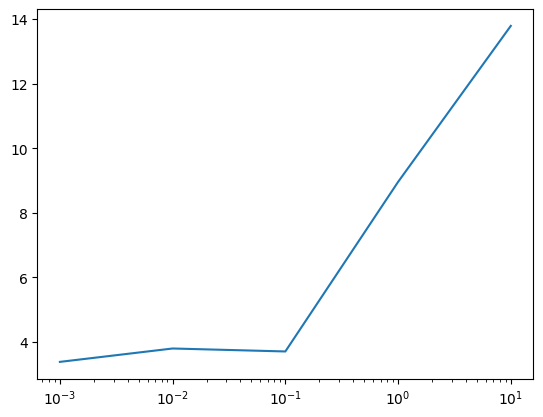

In [715]:
plt.plot([1/t for t in ts], [np.log(1/eps) for eps in errs_12_L6])
plt.xscale('log')

In [716]:
errs_12_L6

[1.0291509005169745e-06,
 0.00012902778594284188,
 0.02456603038144377,
 0.02240955309541321,
 0.03391599515134265]

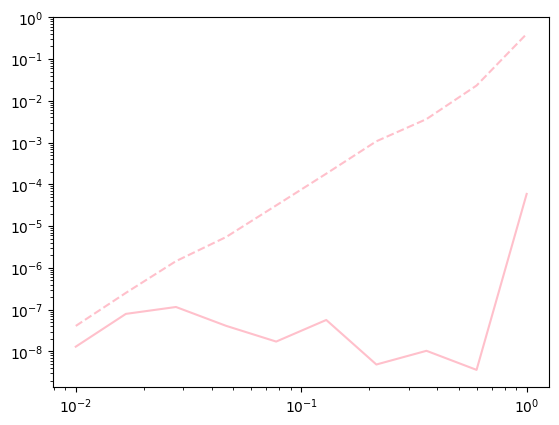

In [579]:
#plt.plot(ts, t_errs3_L6, color='blue', ls='--')
#plt.plot(ts, errs_3_L6, color='blue')
#plt.plot(ts, errs_6_L4, color='purple')
#plt.plot(ts, errs_9_L4, color='red')
plt.plot(ts, errs_12_L6, color='pink')
plt.plot(ts, t_errs12_L6, color='pink', ls='--')


plt.yscale('log')
plt.xscale('log')
#plt.xlim([1e-1, 1])